In [1]:
#install.packages('datamodelr')

In [2]:
library(tidyverse)
library(nycflights13)
library("viridis")
#library("datamodelr")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite


In [3]:
glimpse(flights)
flights %>% head()

Observations: 336,776
Variables: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, …
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558,…
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600,…
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", …
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, …
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N39…
$ origin        

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [4]:
airlines

carrier,name
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.
F9,Frontier Airlines Inc.
FL,AirTran Airways Corporation
HA,Hawaiian Airlines Inc.
MQ,Envoy Air


In [5]:
glimpse(airports)
airports

Observations: 1,458
Variables: 8
$ faa   <chr> "04G", "06A", "06C", "06N", "09J", "0A9", "0G6", "0G7", "0P2", …
$ name  <chr> "Lansdowne Airport", "Moton Field Municipal Airport", "Schaumbu…
$ lat   <dbl> 41.13047, 32.46057, 41.98934, 41.43191, 31.07447, 36.37122, 41.…
$ lon   <dbl> -80.61958, -85.68003, -88.10124, -74.39156, -81.42778, -82.1734…
$ alt   <int> 1044, 264, 801, 523, 11, 1593, 730, 492, 1000, 108, 409, 875, 1…
$ tz    <dbl> -5, -6, -6, -5, -5, -5, -5, -5, -5, -8, -5, -6, -5, -5, -5, -5,…
$ dst   <chr> "A", "A", "A", "A", "A", "A", "A", "A", "U", "A", "A", "U", "A"…
$ tzone <chr> "America/New_York", "America/Chicago", "America/Chicago", "Amer…


faa,name,lat,lon,alt,tz,dst,tzone
04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A,America/New_York
06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A,America/Chicago
06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A,America/Chicago
06N,Randall Airport,41.43191,-74.39156,523,-5,A,America/New_York
09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A,America/New_York
0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A,America/New_York
0G6,Williams County Airport,41.46731,-84.50678,730,-5,A,America/New_York
0G7,Finger Lakes Regional Airport,42.88356,-76.78123,492,-5,A,America/New_York
0P2,Shoestring Aviation Airfield,39.79482,-76.64719,1000,-5,U,America/New_York
0S9,Jefferson County Intl,48.05381,-122.81064,108,-8,A,America/Los_Angeles


In [6]:
glimpse(planes)
planes

Observations: 3,322
Variables: 9
$ tailnum      <chr> "N10156", "N102UW", "N103US", "N104UW", "N10575", "N105U…
$ year         <int> 2004, 1998, 1999, 1999, 2002, 1999, 1999, 1999, 1999, 19…
$ type         <chr> "Fixed wing multi engine", "Fixed wing multi engine", "F…
$ manufacturer <chr> "EMBRAER", "AIRBUS INDUSTRIE", "AIRBUS INDUSTRIE", "AIRB…
$ model        <chr> "EMB-145XR", "A320-214", "A320-214", "A320-214", "EMB-14…
$ engines      <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ seats        <int> 55, 182, 182, 182, 55, 182, 182, 182, 182, 182, 55, 55, …
$ speed        <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ engine       <chr> "Turbo-fan", "Turbo-fan", "Turbo-fan", "Turbo-fan", "Tur…


tailnum,year,type,manufacturer,model,engines,seats,speed,engine
N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NA,Turbo-fan
N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N105UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N107US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N108UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N109UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N110UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan


In [7]:
glimpse(weather)
weather %>% head

Observations: 26,115
Variables: 15
$ origin     <chr> "EWR", "EWR", "EWR", "EWR", "EWR", "EWR", "EWR", "EWR", "E…
$ year       <dbl> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013…
$ month      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ hour       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18,…
$ temp       <dbl> 39.02, 39.02, 39.02, 39.92, 39.02, 37.94, 39.02, 39.92, 39…
$ dewp       <dbl> 26.06, 26.96, 28.04, 28.04, 28.04, 28.04, 28.04, 28.04, 28…
$ humid      <dbl> 59.37, 61.63, 64.43, 62.21, 64.43, 67.21, 64.43, 62.21, 62…
$ wind_dir   <dbl> 270, 250, 240, 250, 260, 240, 240, 250, 260, 260, 260, 330…
$ wind_speed <dbl> 10.35702, 8.05546, 11.50780, 12.65858, 12.65858, 11.50780,…
$ wind_gust  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 20…
$ precip     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ pressure   <dbl

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


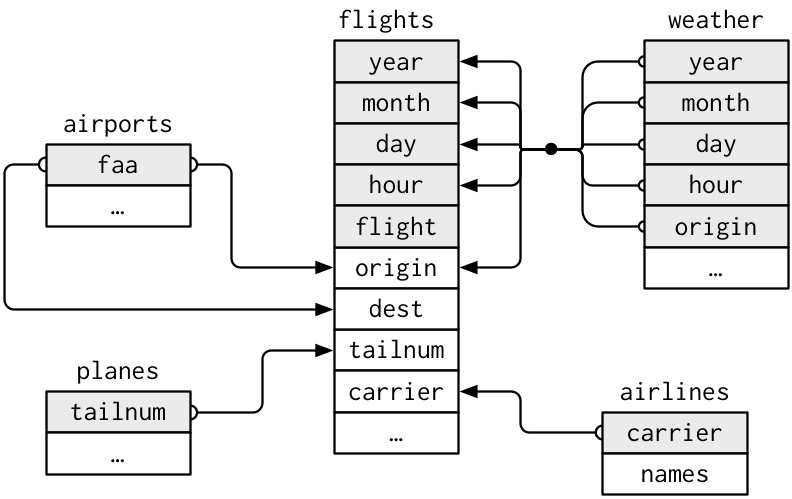

In [8]:
flights_latlon <- flights %>%
  inner_join(select(airports, origin = faa, origin_lat = lat, origin_lon = lon),
    by = "origin"
  ) %>%
  inner_join(select(airports, dest = faa, dest_lat = lat, dest_lon = lon),
    by = "dest"
  )

In [9]:
flights_latlon

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,origin_lat,origin_lon,dest_lat,dest_lon
2013,1,1,517,515,2,830,819,11,UA,...,IAH,227,1400,5,15,2013-01-01 05:00:00,40.69250,-74.16867,29.98443,-95.34144
2013,1,1,533,529,4,850,830,20,UA,...,IAH,227,1416,5,29,2013-01-01 05:00:00,40.77725,-73.87261,29.98443,-95.34144
2013,1,1,542,540,2,923,850,33,AA,...,MIA,160,1089,5,40,2013-01-01 05:00:00,40.63975,-73.77893,25.79325,-80.29056
2013,1,1,554,600,-6,812,837,-25,DL,...,ATL,116,762,6,0,2013-01-01 06:00:00,40.77725,-73.87261,33.63672,-84.42807
2013,1,1,554,558,-4,740,728,12,UA,...,ORD,150,719,5,58,2013-01-01 05:00:00,40.69250,-74.16867,41.97860,-87.90484
2013,1,1,555,600,-5,913,854,19,B6,...,FLL,158,1065,6,0,2013-01-01 06:00:00,40.69250,-74.16867,26.07258,-80.15275
2013,1,1,557,600,-3,709,723,-14,EV,...,IAD,53,229,6,0,2013-01-01 06:00:00,40.77725,-73.87261,38.94453,-77.45581
2013,1,1,557,600,-3,838,846,-8,B6,...,MCO,140,944,6,0,2013-01-01 06:00:00,40.63975,-73.77893,28.42939,-81.30899
2013,1,1,558,600,-2,753,745,8,AA,...,ORD,138,733,6,0,2013-01-01 06:00:00,40.77725,-73.87261,41.97860,-87.90484
2013,1,1,558,600,-2,849,851,-2,B6,...,PBI,149,1028,6,0,2013-01-01 06:00:00,40.63975,-73.77893,26.68316,-80.09559



Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



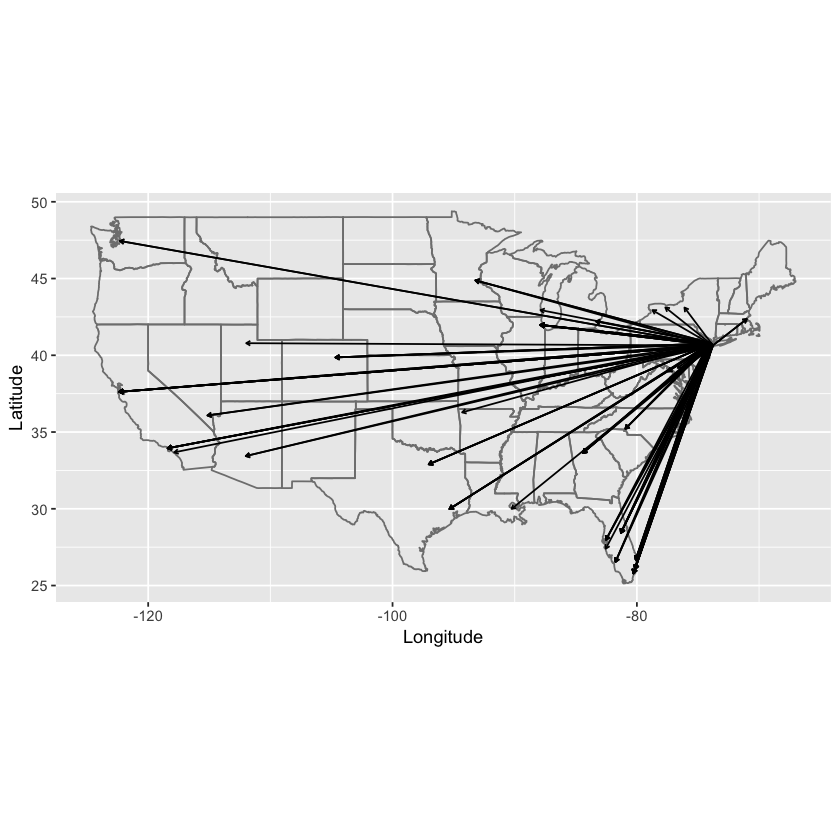

In [10]:
flights_latlon %>%
  slice(1:100) %>%
  ggplot(aes(
    x = origin_lon, xend = dest_lon,
    y = origin_lat, yend = dest_lat
  )) +
  borders("state") +
  geom_segment(arrow = arrow(length = unit(0.1, "cm"))) +
  coord_quickmap() +
  labs(y = "Latitude", x = "Longitude")

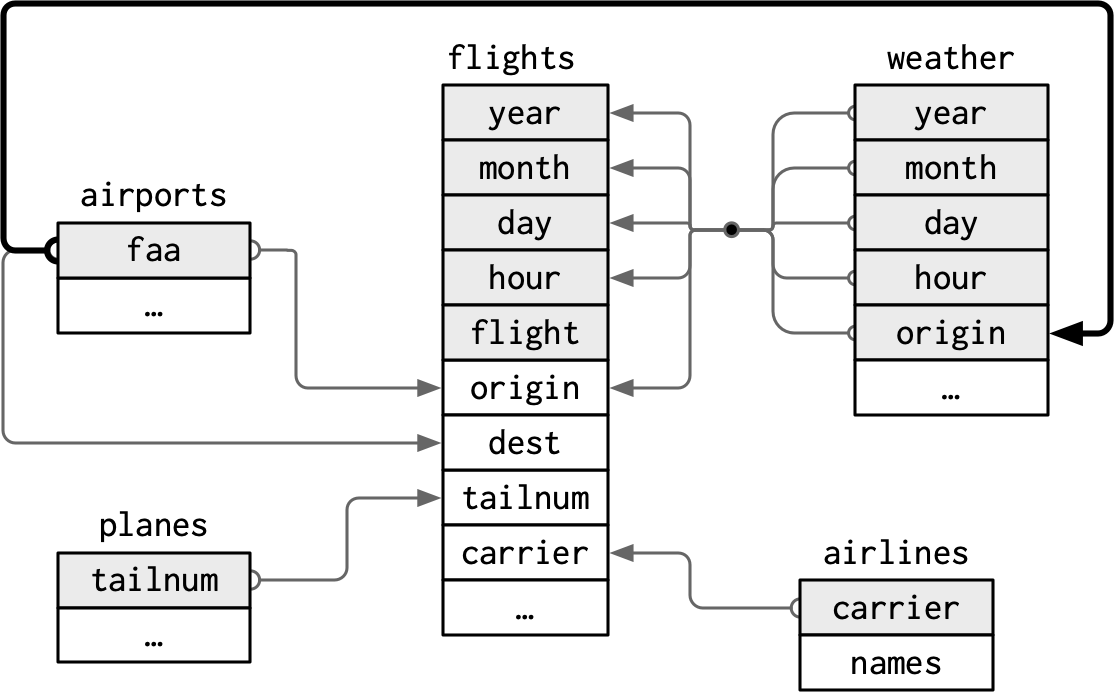

In [11]:
special_days <- tribble(
  ~year, ~month, ~day, ~holiday,
  2013, 01, 01, "New Years Day",
  2013, 07, 04, "Independence Day",
  2013, 11, 29, "Thanksgiving Day",
  2013, 12, 25, "Christmas Day"
)

In [12]:
(planes %>% 
  count(tailnum) %>% 
  filter(n > 1))

tailnum,n


In [13]:
(weather %>% 
  count(year, month, day, hour, origin) %>% 
  filter(n > 1))

year,month,day,hour,origin,n
2013,11,3,1,EWR,2
2013,11,3,1,JFK,2
2013,11,3,1,LGA,2


In [14]:
flights %>% 
  count(year, month, day, flight) %>% 
  filter(n > 1)

year,month,day,flight,n
2013,1,1,1,2
2013,1,1,3,2
2013,1,1,4,2
2013,1,1,11,3
2013,1,1,15,2
2013,1,1,21,2
2013,1,1,27,4
2013,1,1,31,2
2013,1,1,32,2
2013,1,1,35,2


In [15]:
flights %>% 
  count(year, month, day, tailnum) %>% 
  filter(n > 1)

year,month,day,tailnum,n
2013,1,1,N0EGMQ,2
2013,1,1,N11189,2
2013,1,1,N11536,2
2013,1,1,N11544,3
2013,1,1,N11551,2
2013,1,1,N12540,2
2013,1,1,N12567,2
2013,1,1,N13123,2
2013,1,1,N13538,3
2013,1,1,N13566,3


In [16]:
flights %>%
  arrange(year, month, day, sched_dep_time, carrier, flight) %>%
  mutate(flight_id = row_number()) %>%
  glimpse()

Observations: 336,776
Variables: 20
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, …
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ dep_time       <int> 517, 533, 542, 544, 554, 559, 558, 559, 558, 558, 557,…
$ sched_dep_time <int> 515, 529, 540, 545, 558, 559, 600, 600, 600, 600, 600,…
$ dep_delay      <dbl> 2, 4, 2, -1, -4, 0, -2, -1, -2, -2, -3, NA, 1, 0, -5, …
$ arr_time       <int> 830, 850, 923, 1004, 740, 702, 753, 941, 849, 853, 838…
$ sched_arr_time <int> 819, 830, 850, 1022, 728, 706, 745, 910, 851, 856, 846…
$ arr_delay      <dbl> 11, 20, 33, -18, 12, -4, 8, 31, -2, -3, -8, NA, -6, -7…
$ carrier        <chr> "UA", "UA", "AA", "B6", "UA", "B6", "AA", "AA", "B6", …
$ flight         <int> 1545, 1714, 1141, 725, 1696, 1806, 301, 707, 49, 71, 7…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N39463", "N70…
$ origin        

In [17]:
glimpse(Lahman::Batting)
Lahman::Batting %>% head

Observations: 105,861
Variables: 22
$ playerID <chr> "abercda01", "addybo01", "allisar01", "allisdo01", "ansonca0…
$ yearID   <int> 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, …
$ stint    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ teamID   <fct> TRO, RC1, CL1, WS3, RC1, FW1, RC1, BS1, FW1, BS1, CL1, CL1, …
$ lgID     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ G        <int> 1, 25, 29, 27, 25, 12, 1, 31, 1, 18, 22, 1, 10, 3, 20, 29, 1…
$ AB       <int> 4, 118, 137, 133, 120, 49, 4, 157, 5, 86, 89, 3, 36, 15, 94,…
$ R        <int> 0, 30, 28, 28, 29, 9, 0, 66, 1, 13, 18, 0, 6, 7, 24, 26, 0, …
$ H        <int> 0, 32, 40, 44, 39, 11, 1, 63, 1, 13, 27, 0, 7, 6, 33, 32, 0,…
$ X2B      <int> 0, 6, 4, 10, 11, 2, 0, 10, 1, 2, 1, 0, 0, 0, 9, 3, 0, 0, 1, …
$ X3B      <int> 0, 0, 5, 2, 3, 1, 0, 9, 0, 1, 10, 0, 0, 0, 1, 3, 0, 0, 1, 0,…
$ HR       <int> 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ RBI      <int>

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
abercda01,1871,1,TRO,NA,1,4,0,0,0,...,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,...,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,...,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,...,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,...,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,...,5,0,1,0,1,NA,NA,NA,NA,0


In [18]:
Lahman::Batting %>%
  count(playerID, yearID, stint) %>%
  filter(n > 1) %>%
  nrow()

[1] 0

In [19]:
#install.packages('babynames')

In [20]:
glimpse(babynames::babynames)
babynames::babynames %>% head

Observations: 1,924,665
Variables: 5
$ year <dbl> 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880…
$ sex  <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F",…
$ name <chr> "Mary", "Anna", "Emma", "Elizabeth", "Minnie", "Margaret", "Ida"…
$ n    <int> 7065, 2604, 2003, 1939, 1746, 1578, 1472, 1414, 1320, 1288, 1258…
$ prop <dbl> 0.07238359, 0.02667896, 0.02052149, 0.01986579, 0.01788843, 0.01…


year,sex,name,n,prop
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


In [21]:
babynames::babynames %>%
  count(year, sex, name) %>%
  filter(n > 1) %>%
  nrow()

[1] 0

In [22]:
#install.packages('nasaweather')

In [23]:
glimpse(nasaweather::atmos)
nasaweather::atmos %>% head

Observations: 41,472
Variables: 11
$ lat       <dbl> 36.200000, 33.704348, 31.208696, 28.713043, 26.217391, 23.7…
$ long      <dbl> -113.8000, -113.8000, -113.8000, -113.8000, -113.8000, -113…
$ year      <int> 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,…
$ month     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ surftemp  <dbl> 272.7, 279.5, 284.7, 289.3, 292.2, 294.1, 295.0, 298.3, 300…
$ temp      <dbl> 272.1, 282.2, 285.2, 290.7, 292.7, 293.6, 294.6, 296.9, 297…
$ pressure  <dbl> 835, 940, 960, 990, 1000, 1000, 1000, 1000, 1000, 1000, 100…
$ ozone     <dbl> 304, 304, 298, 276, 274, 264, 258, 252, 250, 250, 248, 248,…
$ cloudlow  <dbl> 7.5, 11.5, 16.5, 20.5, 26.0, 30.0, 29.5, 26.5, 27.5, 26.0, …
$ cloudmid  <dbl> 34.5, 32.5, 26.0, 14.5, 10.5, 9.5, 11.0, 17.5, 18.5, 16.5, …
$ cloudhigh <dbl> 26.0, 20.0, 16.0, 13.0, 7.5, 8.0, 14.5, 19.5, 22.5, 21.0, 1…


lat,long,year,month,surftemp,temp,pressure,ozone,cloudlow,cloudmid,cloudhigh
36.20000,-113.8,1995,1,272.7,272.1,835,304,7.5,34.5,26.0
33.70435,-113.8,1995,1,279.5,282.2,940,304,11.5,32.5,20.0
31.20870,-113.8,1995,1,284.7,285.2,960,298,16.5,26.0,16.0
28.71304,-113.8,1995,1,289.3,290.7,990,276,20.5,14.5,13.0
26.21739,-113.8,1995,1,292.2,292.7,1000,274,26.0,10.5,7.5
23.72174,-113.8,1995,1,294.1,293.6,1000,264,30.0,9.5,8.0


In [24]:
nasaweather::atmos %>%
  count(lat, long, year, month) %>%
  filter(n > 1) %>%
  nrow()

[1] 0

In [25]:
#install.packages('fueleconomy')

In [26]:
glimpse(fueleconomy::vehicles)
fueleconomy::vehicles %>% head

Observations: 33,442
Variables: 12
$ id    <int> 27550, 28426, 27549, 28425, 1032, 1033, 3347, 13309, 13310, 133…
$ make  <chr> "AM General", "AM General", "AM General", "AM General", "AM Gen…
$ model <chr> "DJ Po Vehicle 2WD", "DJ Po Vehicle 2WD", "FJ8c Post Office", "…
$ year  <int> 1984, 1984, 1984, 1984, 1985, 1985, 1987, 1997, 1997, 1997, 199…
$ class <chr> "Special Purpose Vehicle 2WD", "Special Purpose Vehicle 2WD", "…
$ trans <chr> "Automatic 3-spd", "Automatic 3-spd", "Automatic 3-spd", "Autom…
$ drive <chr> "2-Wheel Drive", "2-Wheel Drive", "2-Wheel Drive", "2-Wheel Dri…
$ cyl   <int> 4, 4, 6, 6, 4, 6, 6, 4, 4, 6, 4, 4, 6, 4, 4, 6, 5, 5, 6, 5, 6, …
$ displ <dbl> 2.5, 2.5, 4.2, 4.2, 2.5, 4.2, 3.8, 2.2, 2.2, 3.0, 2.3, 2.3, 3.0…
$ fuel  <chr> "Regular", "Regular", "Regular", "Regular", "Regular", "Regular…
$ hwy   <int> 17, 17, 13, 13, 17, 13, 21, 26, 28, 26, 27, 29, 26, 27, 29, 26,…
$ cty   <int> 18, 18, 13, 13, 16, 13, 14, 20, 22, 18, 19, 21, 17, 20, 21, 17,…


id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,17,18
28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,17,18
27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,13,13
28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,13,13
1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4,2.5,Regular,17,16
1033,AM General,Post Office DJ8 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,6,4.2,Regular,13,13


In [27]:
fueleconomy::vehicles %>%
  count(id) %>%
  filter(n > 1) %>%
  nrow()

[1] 0

In [28]:
ggplot2::diamonds %>%
  distinct() %>%
  nrow()

nrow(ggplot2::diamonds)

diamonds <- mutate(ggplot2::diamonds, id = row_number())

[1] 53794

[1] 53940

In [29]:
glimpse(Lahman::Batting)
glimpse(Lahman::Master)
glimpse(Lahman::Salaries)

Lahman::Master %>%
  count(playerID) %>%
  filter(n > 1) %>%
  nrow()

Lahman::Salaries %>%
  count(playerID) %>%
  filter(n > 1) %>%
  nrow()

Observations: 105,861
Variables: 22
$ playerID <chr> "abercda01", "addybo01", "allisar01", "allisdo01", "ansonca0…
$ yearID   <int> 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, …
$ stint    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ teamID   <fct> TRO, RC1, CL1, WS3, RC1, FW1, RC1, BS1, FW1, BS1, CL1, CL1, …
$ lgID     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ G        <int> 1, 25, 29, 27, 25, 12, 1, 31, 1, 18, 22, 1, 10, 3, 20, 29, 1…
$ AB       <int> 4, 118, 137, 133, 120, 49, 4, 157, 5, 86, 89, 3, 36, 15, 94,…
$ R        <int> 0, 30, 28, 28, 29, 9, 0, 66, 1, 13, 18, 0, 6, 7, 24, 26, 0, …
$ H        <int> 0, 32, 40, 44, 39, 11, 1, 63, 1, 13, 27, 0, 7, 6, 33, 32, 0,…
$ X2B      <int> 0, 6, 4, 10, 11, 2, 0, 10, 1, 2, 1, 0, 0, 0, 9, 3, 0, 0, 1, …
$ X3B      <int> 0, 0, 5, 2, 3, 1, 0, 9, 0, 1, 10, 0, 0, 0, 1, 3, 0, 0, 1, 0,…
$ HR       <int> 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ RBI      <int>

[1] 0

[1] 3934

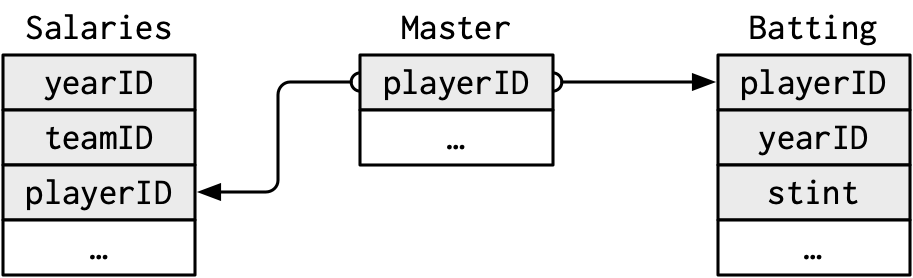

In [30]:
dm1 <- dm_from_data_frames(list(
  Batting = Lahman::Batting,
  Master = Lahman::Master,
  Salaries = Lahman::Salaries
)) %>%
  dm_set_key("Batting", c("playerID", "yearID", "stint")) %>%
  dm_set_key("Master", "playerID") %>%
  dm_set_key("Salaries", c("yearID", "teamID", "playerID")) %>%
  dm_add_references(
    Batting$playerID == Master$playerID,
    Salaries$playerID == Master$playerID
  )

dm_create_graph(dm1, rankdir = "LR", columnArrows = TRUE) %>%
  dm_render_graph()

ERROR: Error in dm_from_data_frames(list(Batting = Lahman::Batting, Master = Lahman::Master, : could not find function "dm_from_data_frames"


In [ ]:
glimpse(Lahman::Master)
glimpse(Lahman::Managers)
glimpse(Lahman::AwardsManagers)


In [ ]:

Lahman::Master %>%
  count(playerID) %>%
  filter(n > 1) %>%
  nrow()

Lahman::Managers %>%
  count(yearID, teamID, inseason) %>%
  filter(n > 1) %>%
  nrow()

Lahman::AwardsManagers %>%
  count(playerID, awardID, yearID) %>%
  filter(n > 1) %>%
  nrow()

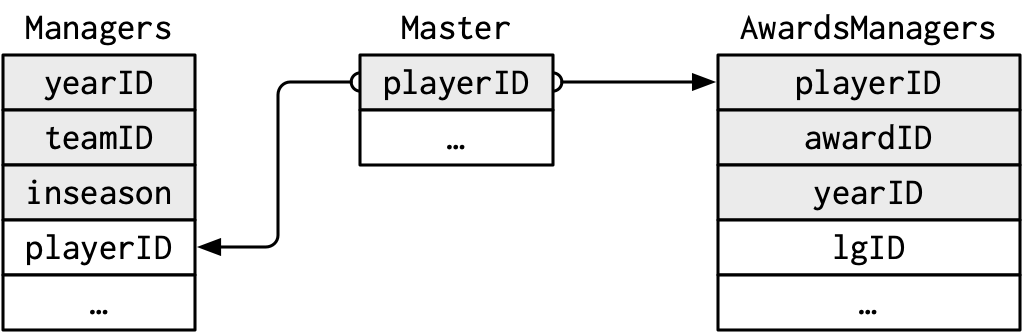

In [31]:
dm2 <- dm_from_data_frames(list(
  Master = Lahman::Master,
  Managers = Lahman::Managers,
  AwardsManagers = Lahman::AwardsManagers
)) %>%
  dm_set_key("Master", "playerID") %>%
  dm_set_key("Managers", c("yearID", "teamID", "inseason")) %>%
  dm_set_key("AwardsManagers", c("playerID", "awardID", "yearID")) %>%
  dm_add_references(
    Managers$playerID == Master$playerID,
    AwardsManagers$playerID == Master$playerID
  )

dm_create_graph(dm2, rankdir = "LR", columnArrows = TRUE) %>%
  dm_render_graph()

ERROR: Error in dm_from_data_frames(list(Master = Lahman::Master, Managers = Lahman::Managers, : could not find function "dm_from_data_frames"


In [32]:
glimpse(Lahman::Batting)
glimpse(Lahman::Pitching)
glimpse(Lahman::Fielding)

Lahman::Batting %>%
  count(playerID, yearID, stint) %>%
  filter(n > 1) %>%
  nrow()

Lahman::Pitching %>%
  count(playerID, yearID, stint) %>%
  filter(n > 1) %>%
  nrow()

Lahman::Fielding %>%
  count(playerID, yearID, stint, POS) %>%
  filter(n > 1) %>%
  nrow()

Observations: 105,861
Variables: 22
$ playerID <chr> "abercda01", "addybo01", "allisar01", "allisdo01", "ansonca0…
$ yearID   <int> 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, 1871, …
$ stint    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ teamID   <fct> TRO, RC1, CL1, WS3, RC1, FW1, RC1, BS1, FW1, BS1, CL1, CL1, …
$ lgID     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ G        <int> 1, 25, 29, 27, 25, 12, 1, 31, 1, 18, 22, 1, 10, 3, 20, 29, 1…
$ AB       <int> 4, 118, 137, 133, 120, 49, 4, 157, 5, 86, 89, 3, 36, 15, 94,…
$ R        <int> 0, 30, 28, 28, 29, 9, 0, 66, 1, 13, 18, 0, 6, 7, 24, 26, 0, …
$ H        <int> 0, 32, 40, 44, 39, 11, 1, 63, 1, 13, 27, 0, 7, 6, 33, 32, 0,…
$ X2B      <int> 0, 6, 4, 10, 11, 2, 0, 10, 1, 2, 1, 0, 0, 0, 9, 3, 0, 0, 1, …
$ X3B      <int> 0, 0, 5, 2, 3, 1, 0, 9, 0, 1, 10, 0, 0, 0, 1, 3, 0, 0, 1, 0,…
$ HR       <int> 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ RBI      <int>

[1] 0

[1] 0

[1] 0

In [33]:
nrow(anti_join(Lahman::Pitching, Lahman::Batting,
  by = c("playerID", "yearID", "stint")
              ))

[1] 0

In [34]:
nrow(anti_join(Lahman::Fielding, Lahman::Batting,
  by = c("playerID", "yearID", "stint")
               ))

[1] 0

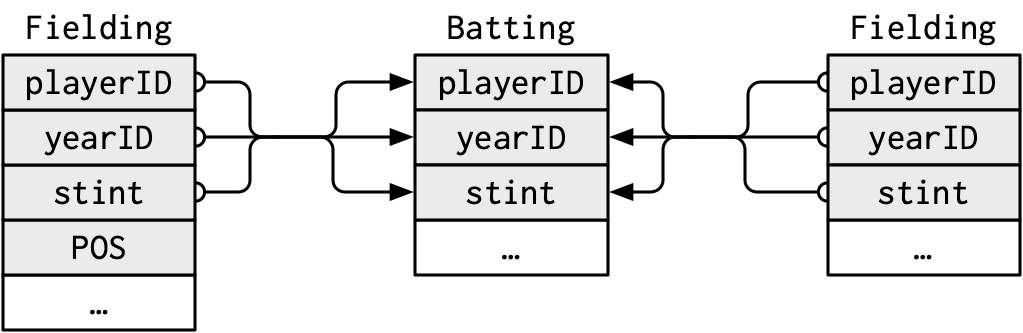

In [35]:
head(flights); head(airlines)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


carrier,name
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.


In [36]:
flights2 <- flights %>% 
  select(year:day, hour, origin, dest, tailnum, carrier)
head(flights2)

year,month,day,hour,origin,dest,tailnum,carrier
2013,1,1,5,EWR,IAH,N14228,UA
2013,1,1,5,LGA,IAH,N24211,UA
2013,1,1,5,JFK,MIA,N619AA,AA
2013,1,1,5,JFK,BQN,N804JB,B6
2013,1,1,6,LGA,ATL,N668DN,DL
2013,1,1,5,EWR,ORD,N39463,UA


In [37]:
head(flights2 %>%
  select(-origin, -dest) %>% 
  left_join(airlines, by = "carrier"))

year,month,day,hour,tailnum,carrier,name
2013,1,1,5,N14228,UA,United Air Lines Inc.
2013,1,1,5,N24211,UA,United Air Lines Inc.
2013,1,1,5,N619AA,AA,American Airlines Inc.
2013,1,1,5,N804JB,B6,JetBlue Airways
2013,1,1,6,N668DN,DL,Delta Air Lines Inc.
2013,1,1,5,N39463,UA,United Air Lines Inc.


In [38]:
(flights2 %>%
  select(-origin, -dest) %>% 
  mutate(name = airlines$name[match(carrier, airlines$carrier)])) %>% head

year,month,day,hour,tailnum,carrier,name
2013,1,1,5,N14228,UA,United Air Lines Inc.
2013,1,1,5,N24211,UA,United Air Lines Inc.
2013,1,1,5,N619AA,AA,American Airlines Inc.
2013,1,1,5,N804JB,B6,JetBlue Airways
2013,1,1,6,N668DN,DL,Delta Air Lines Inc.
2013,1,1,5,N39463,UA,United Air Lines Inc.


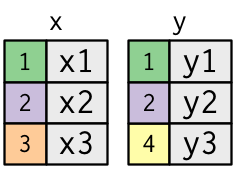

In [39]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     3, "x3"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     4, "y3"
)
x; y

key,val_x
1,x1
2,x2
3,x3


key,val_y
1,y1
2,y2
4,y3


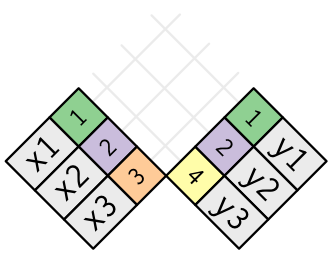

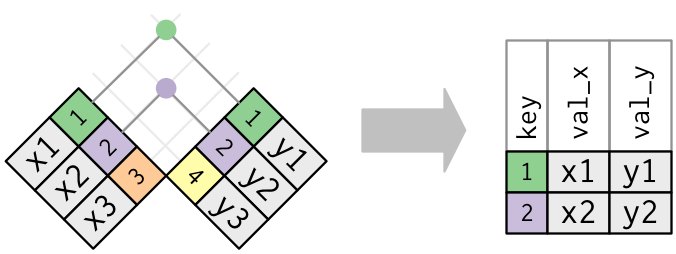

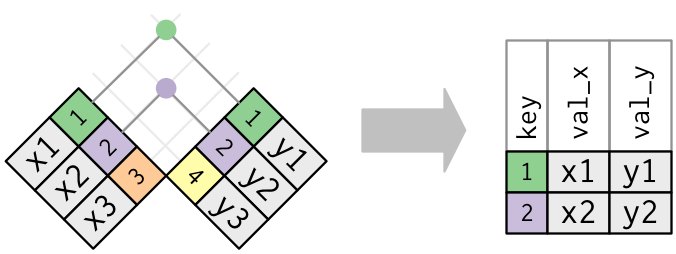

In [40]:
x %>% 
  inner_join(y, by = "key")
x;y

key,val_x,val_y
1,x1,y1
2,x2,y2


key,val_x
1,x1
2,x2
3,x3


key,val_y
1,y1
2,y2
4,y3


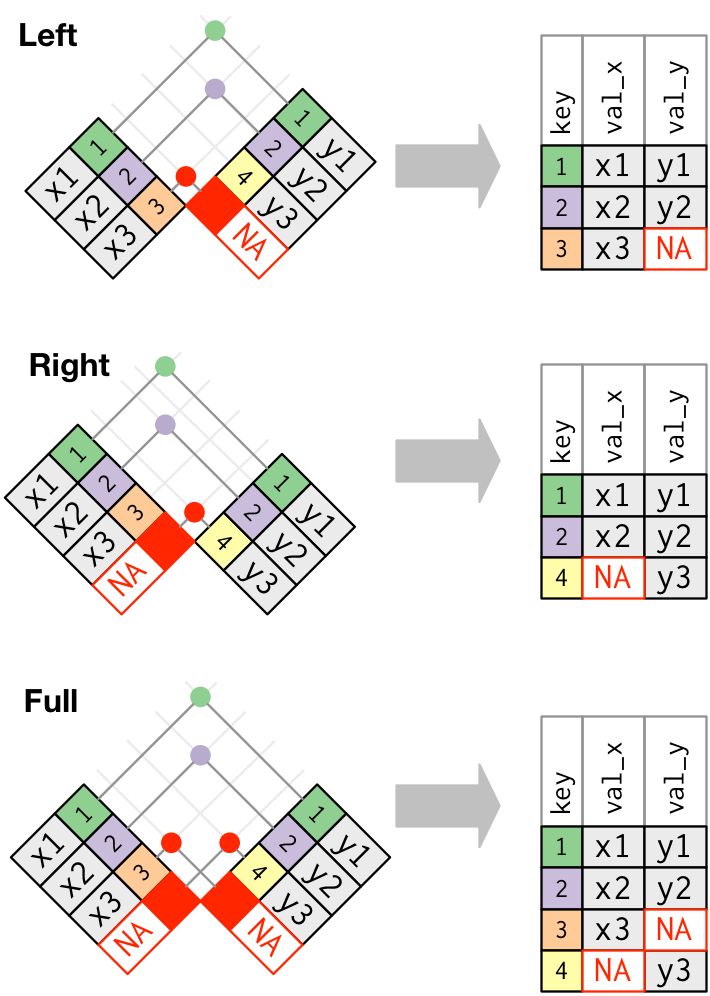

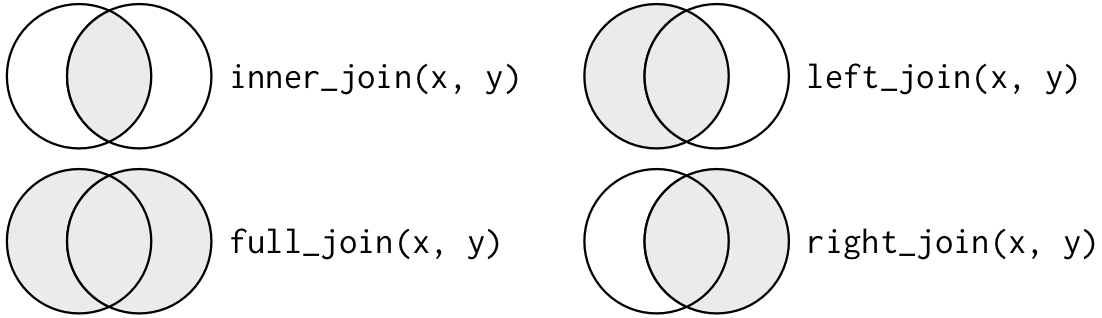

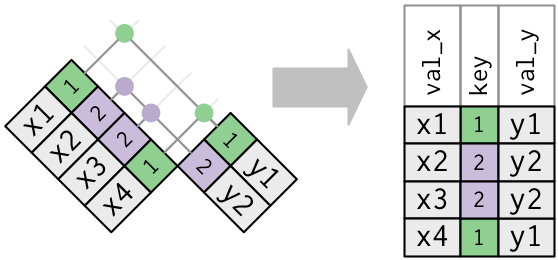

In [41]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     1, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2"
)
left_join(x, y, by = "key")

key,val_x,val_y
1,x1,y1
2,x2,y2
2,x3,y2
1,x4,y1


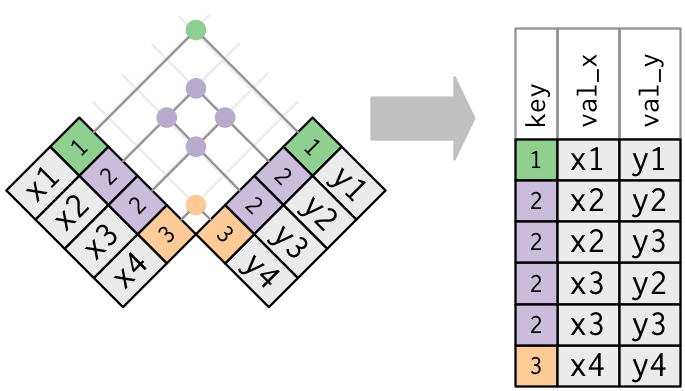

In [42]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     3, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     2, "y3",
     3, "y4"
)
left_join(x, y, by = "key")

key,val_x,val_y
1,x1,y1
2,x2,y2
2,x2,y3
2,x3,y2
2,x3,y3
3,x4,y4


In [43]:
flights2 %>% 
  left_join(weather) %>% head

Joining, by = c("year", "month", "day", "hour", "origin")


year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250,14.96014,21.86482,0,1011.4,10,2013-01-01 05:00:00
2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,5,EWR,ORD,N39463,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00


In [44]:
(flights2 %>% 
  left_join(planes, by = "tailnum")) %>% head

year.x,month,day,hour,origin,dest,tailnum,carrier,year.y,type,manufacturer,model,engines,seats,speed,engine
2013,1,1,5,EWR,IAH,N14228,UA,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,LGA,IAH,N24211,UA,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,JFK,MIA,N619AA,AA,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,5,JFK,BQN,N804JB,B6,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,ATL,N668DN,DL,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,5,EWR,ORD,N39463,UA,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan


In [45]:
(flights2 %>% 
  left_join(airports, c("dest" = "faa"))) %>% head

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
2013,1,1,5,EWR,IAH,N14228,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,LGA,IAH,N24211,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,JFK,MIA,N619AA,AA,Miami Intl,25.79325,-80.29056,8,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,NA,NA,NA,NA,NA,NA,NA
2013,1,1,6,LGA,ATL,N668DN,DL,Hartsfield Jackson Atlanta Intl,33.63672,-84.42807,1026,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago


In [46]:
(flights2 %>% 
  left_join(airports, c("origin" = "faa"))) %>% head

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
2013,1,1,5,EWR,IAH,N14228,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,5,LGA,IAH,N24211,UA,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,JFK,MIA,N619AA,AA,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,6,LGA,ATL,N668DN,DL,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York


In [47]:
flights2 <- flights %>%
  select(year:day, hour, origin, dest, tailnum, carrier)

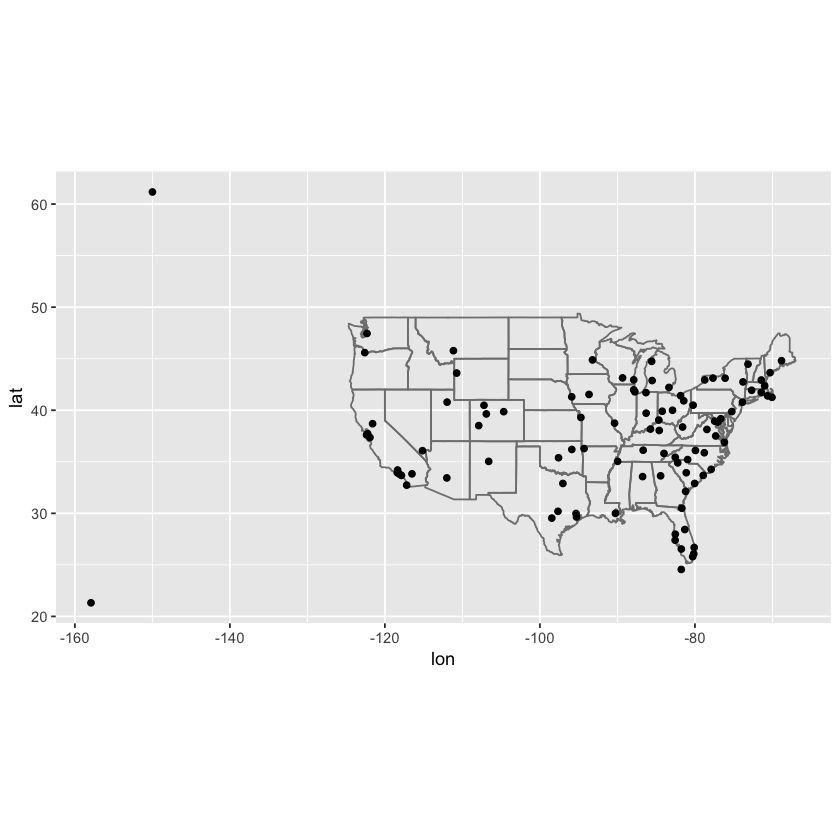

In [48]:
airports %>%
  semi_join(flights, c("faa" = "dest")) %>%
  ggplot(aes(lon, lat)) +
    borders("state") +
    geom_point() +
    coord_quickmap()

In [49]:
avg_dest_delays <-
  flights %>%
  group_by(dest) %>%
  # arrival delay NA's are cancelled flights
  summarise(delay = mean(arr_delay, na.rm = TRUE)) %>%
  inner_join(airports, by = c(dest = "faa"))
head(avg_dest_delays)

dest,delay,name,lat,lon,alt,tz,dst,tzone
ABQ,4.381890,Albuquerque International Sunport,35.04022,-106.60919,5355,-7,A,America/Denver
ACK,4.852273,Nantucket Mem,41.25305,-70.06018,48,-5,A,America/New_York
ALB,14.397129,Albany Intl,42.74827,-73.80169,285,-5,A,America/New_York
ANC,-2.500000,Ted Stevens Anchorage Intl,61.17436,-149.99636,152,-9,A,America/Anchorage
ATL,11.300113,Hartsfield Jackson Atlanta Intl,33.63672,-84.42807,1026,-5,A,America/New_York
AUS,6.019909,Austin Bergstrom Intl,30.19453,-97.66989,542,-6,A,America/Chicago


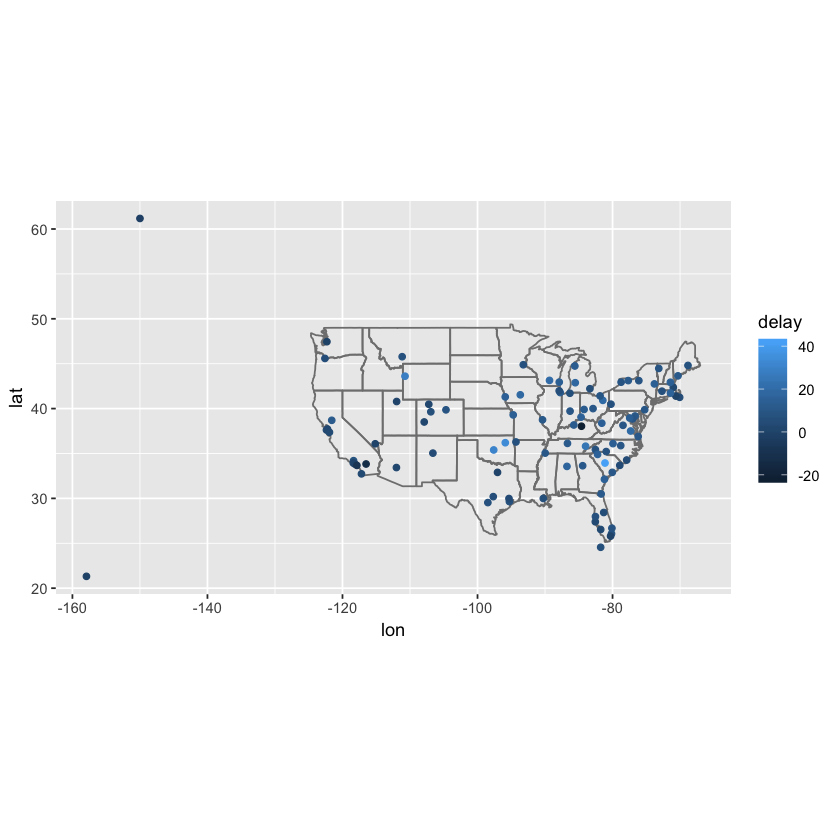

In [50]:
avg_dest_delays %>%
  ggplot(aes(lon, lat, colour = delay)) +
  borders("state") +
  geom_point() +
  coord_quickmap()

In [51]:
airport_locations <- airports %>%
  select(faa, lat, lon)
head(airport_locations)

faa,lat,lon
04G,41.13047,-80.61958
06A,32.46057,-85.68003
06C,41.98934,-88.10124
06N,41.43191,-74.39156
09J,31.07447,-81.42778
0A9,36.37122,-82.17342


In [52]:
flights %>%
  select(year:day, hour, origin, dest) %>%
  left_join(
    airport_locations,
    by = c("origin" = "faa")
  ) %>%
  left_join(
    airport_locations,
    by = c("dest" = "faa")
  ) %>% head

year,month,day,hour,origin,dest,lat.x,lon.x,lat.y,lon.y
2013,1,1,5,EWR,IAH,40.69250,-74.16867,29.98443,-95.34144
2013,1,1,5,LGA,IAH,40.77725,-73.87261,29.98443,-95.34144
2013,1,1,5,JFK,MIA,40.63975,-73.77893,25.79325,-80.29056
2013,1,1,5,JFK,BQN,40.63975,-73.77893,NA,NA
2013,1,1,6,LGA,ATL,40.77725,-73.87261,33.63672,-84.42807
2013,1,1,5,EWR,ORD,40.69250,-74.16867,41.97860,-87.90484


In [53]:
airport_locations <- airports %>%
  select(faa, lat, lon)

flights %>%
  select(year:day, hour, origin, dest) %>%
  left_join(
    airport_locations,
    by = c("origin" = "faa")
  ) %>%
  left_join(
    airport_locations,
    by = c("dest" = "faa"),
    suffix = c("_origin", "_dest")
    # existing lat and lon variables in tibble gain the _origin suffix
    # new lat and lon variables are given _dest suffix
  ) %>% head

year,month,day,hour,origin,dest,lat_origin,lon_origin,lat_dest,lon_dest
2013,1,1,5,EWR,IAH,40.69250,-74.16867,29.98443,-95.34144
2013,1,1,5,LGA,IAH,40.77725,-73.87261,29.98443,-95.34144
2013,1,1,5,JFK,MIA,40.63975,-73.77893,25.79325,-80.29056
2013,1,1,5,JFK,BQN,40.63975,-73.77893,NA,NA
2013,1,1,6,LGA,ATL,40.77725,-73.87261,33.63672,-84.42807
2013,1,1,5,EWR,ORD,40.69250,-74.16867,41.97860,-87.90484


In [54]:
head(flights); head(planes)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


tailnum,year,type,manufacturer,model,engines,seats,speed,engine
N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NA,Turbo-fan
N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N105UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan


In [55]:
(plane_cohorts <- inner_join(flights,
  select(planes, tailnum, plane_year = year),
  by = "tailnum"
)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,plane_year
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,1999
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,1998
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,1990
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,2012
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,1991
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,2012


In [56]:
plane_cohorts <- inner_join(flights,
  select(planes, tailnum, plane_year = year),
  by = "tailnum"
) %>%
  mutate(age = year - plane_year) %>%
  filter(!is.na(age)) %>%
  mutate(age = pmin(25, age)) %>%
  group_by(age) %>%
  summarise(
    dep_delay_mean = mean(dep_delay, na.rm = TRUE),
    dep_delay_sd = sd(dep_delay, na.rm = TRUE),
    arr_delay_mean = mean(arr_delay, na.rm = TRUE),
    arr_delay_sd = sd(arr_delay, na.rm = TRUE),
    n_arr_delay = sum(!is.na(arr_delay)),
    n_dep_delay = sum(!is.na(arr_delay))
  )
head(plane_cohorts)

age,dep_delay_mean,dep_delay_sd,arr_delay_mean,arr_delay_sd,n_arr_delay,n_dep_delay
0,10.587102,34.41564,4.006506,38.46747,4611,4611
1,9.642778,31.90049,2.850889,37.40447,7196,7196
2,11.840951,41.75714,5.696238,46.82598,6008,6008
3,12.534551,37.50501,5.175285,41.85674,3771,3771
4,10.957321,35.53487,4.920724,39.74588,6572,6572
5,13.158852,39.63434,5.572951,43.94123,17731,17731


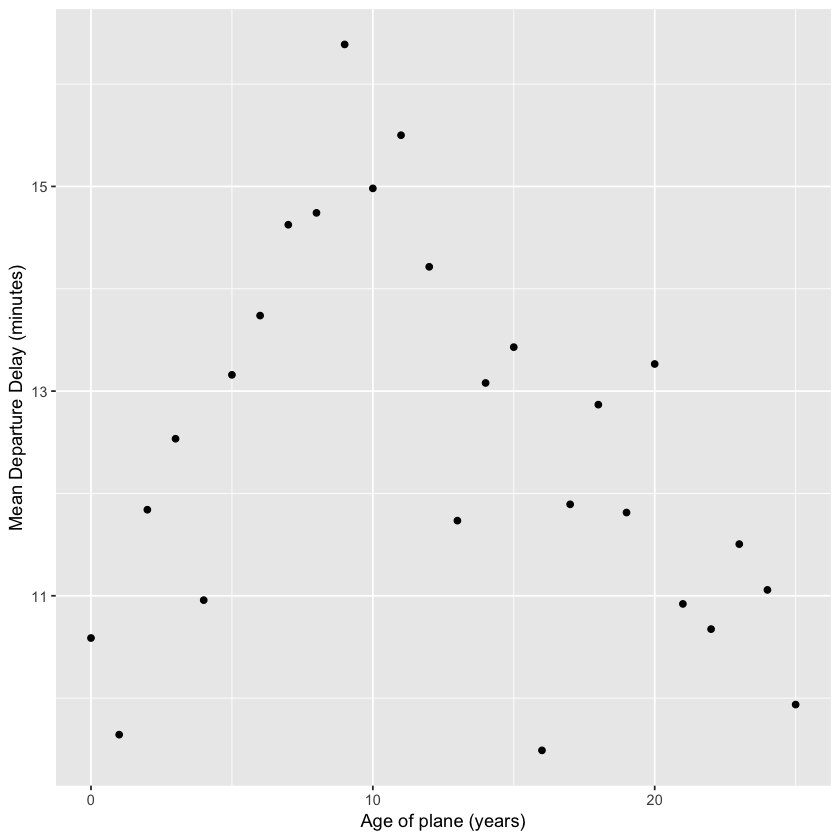

In [57]:
ggplot(plane_cohorts, aes(x = age, y = dep_delay_mean)) +
  geom_point() +
  scale_x_continuous("Age of plane (years)", breaks = seq(0, 50, by = 10)) +
  scale_y_continuous("Mean Departure Delay (minutes)")

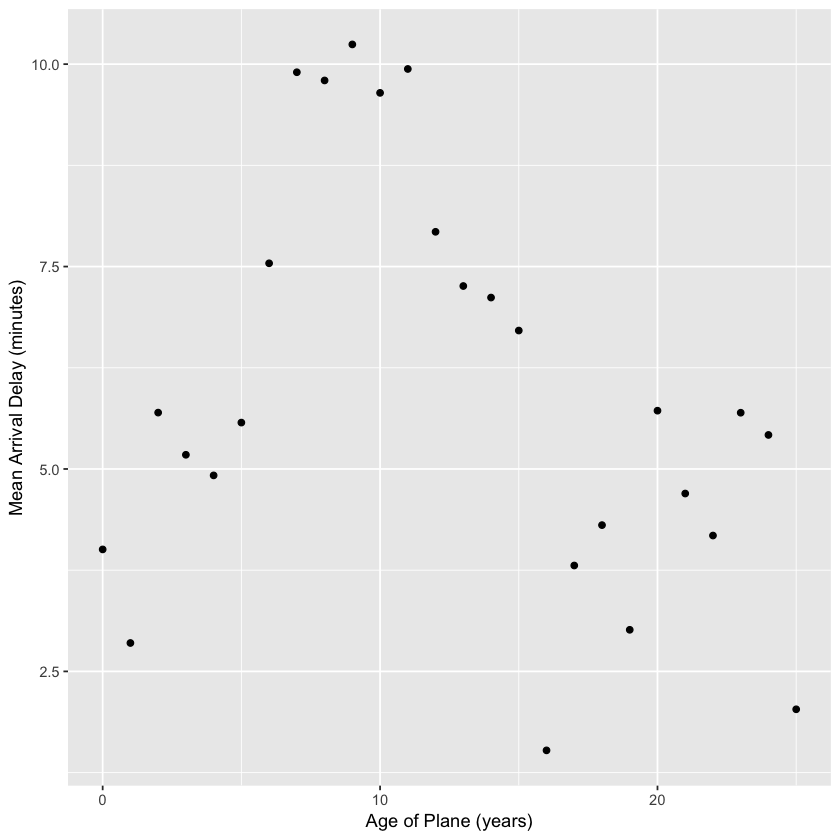

In [58]:
ggplot(plane_cohorts, aes(x = age, y = arr_delay_mean)) +
  geom_point() +
  scale_x_continuous("Age of Plane (years)", breaks = seq(0, 50, by = 10)) +
  scale_y_continuous("Mean Arrival Delay (minutes)")

In [59]:
flight_weather <-
  flights %>%
  inner_join(weather, by = c(
    "origin" = "origin",
    "year" = "year",
    "month" = "month",
    "day" = "day",
    "hour" = "hour"
  ))
head(flight_weather)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y
2013,1,1,517,515,2,830,819,11,UA,...,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,...,39.92,24.98,54.81,250,14.96014,21.86482,0,1011.4,10,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,...,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,...,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,...,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,...,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00


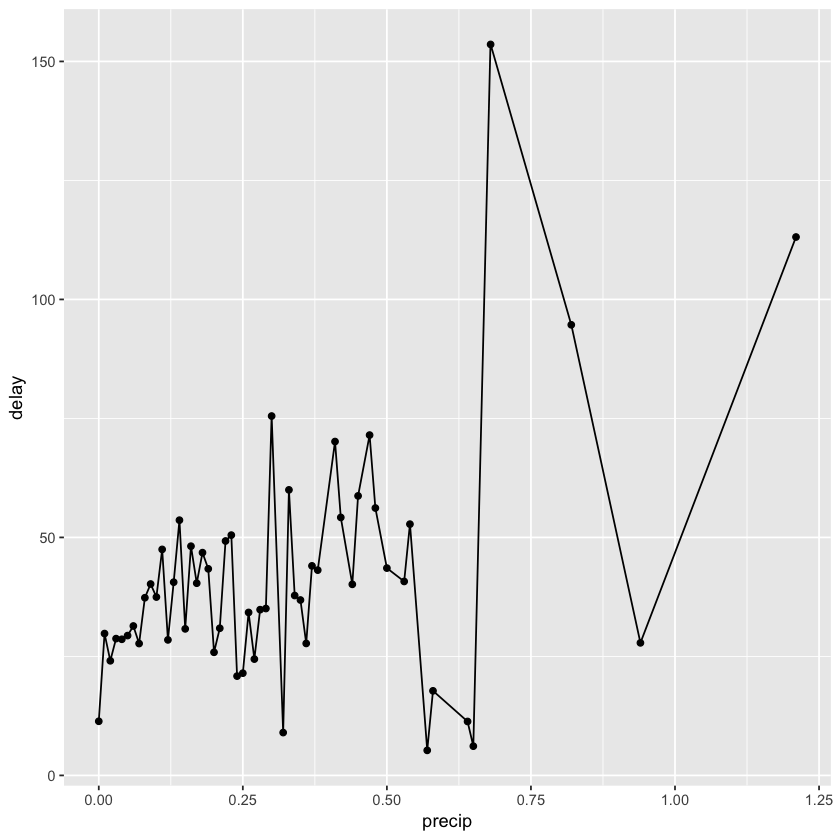

In [60]:
flight_weather %>%
  group_by(precip) %>%
  summarise(delay = mean(dep_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = precip, y = delay)) +
  geom_line() + geom_point()

Warning message:
“Removed 3 rows containing missing values (geom_point).”

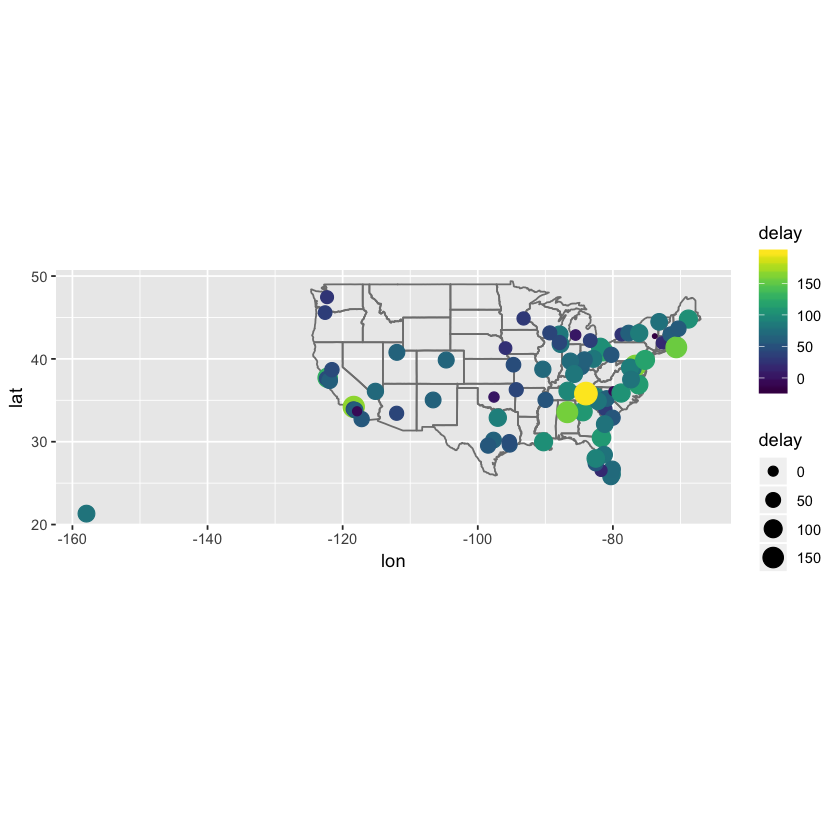

In [61]:
flights %>%
  filter(year == 2013, month == 6, day == 13) %>%
  group_by(dest) %>%
  summarise(delay = mean(arr_delay, na.rm = TRUE)) %>%
  inner_join(airports, by = c("dest" = "faa")) %>%
  ggplot(aes(y = lat, x = lon, size = delay, colour = delay)) +
  borders("state") +
  geom_point() +
  coord_quickmap() +
  scale_colour_viridis()

In [62]:
top_dest <- flights %>%
  count(dest, sort = TRUE) %>%
  head(10)
top_dest

dest,n
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728
DCA,9705


In [63]:
flights %>% 
  filter(dest %in% top_dest$dest)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,924,917,7,UA,194,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,923,937,-14,UA,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01 06:00:00
2013,1,1,559,559,0,702,706,-4,B6,1806,N708JB,JFK,BOS,44,187,5,59,2013-01-01 05:00:00
2013,1,1,600,600,0,851,858,-7,B6,371,N595JB,LGA,FLL,152,1076,6,0,2013-01-01 06:00:00


In [64]:
flights %>% 
  semi_join(top_dest)

Joining, by = "dest"


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,924,917,7,UA,194,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,923,937,-14,UA,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01 06:00:00
2013,1,1,559,559,0,702,706,-4,B6,1806,N708JB,JFK,BOS,44,187,5,59,2013-01-01 05:00:00
2013,1,1,600,600,0,851,858,-7,B6,371,N595JB,LGA,FLL,152,1076,6,0,2013-01-01 06:00:00


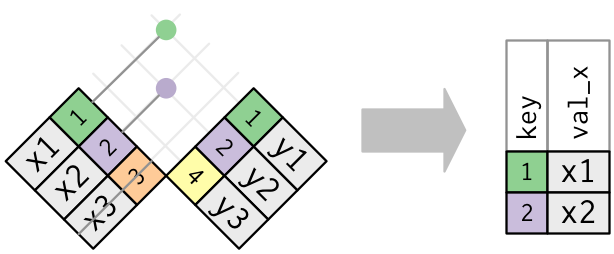

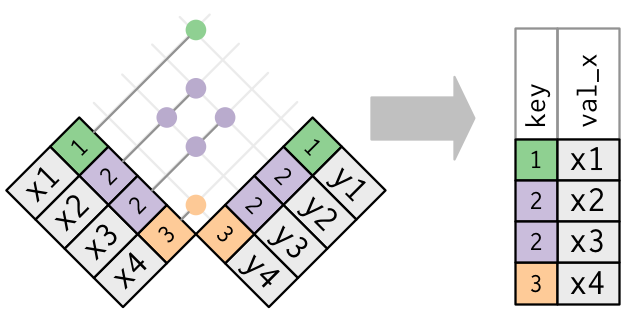

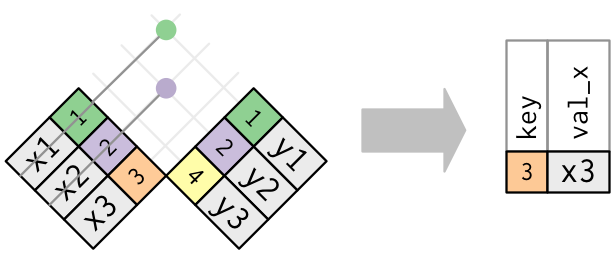

In [65]:
flights %>%
  anti_join(planes, by = "tailnum") %>%
  count(tailnum, sort = TRUE)  %>% head()

tailnum,n
NA,2512
N725MQ,575
N722MQ,513
N723MQ,507
N713MQ,483
N735MQ,396


In [66]:
flights %>%
  anti_join(planes, by = "tailnum") %>%
  count(carrier, sort = TRUE)

carrier,n
MQ,25397
AA,22558
UA,1693
9E,1044
B6,830
US,699
FL,187
DL,110
F9,50
WN,38


In [67]:
planes_gte100 <-
  filter(flights) %>%
  group_by(tailnum) %>%
  count() %>%
  filter(n >= 100)
planes_gte100 %>% head

tailnum,n
NA,2512
N0EGMQ,371
N10156,153
N10575,289
N11106,129
N11107,148


In [68]:
flights %>%
  semi_join(planes_gte100, by = "tailnum") %>% head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00


In [69]:
fueleconomy::vehicles %>%
  semi_join(fueleconomy::common, by = c("make", "model")) %>% head

id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
1833,Acura,Integra,1986,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,1.6,Regular,28,22
1834,Acura,Integra,1986,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,1.6,Regular,28,23
3037,Acura,Integra,1987,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,1.6,Regular,28,22
3038,Acura,Integra,1987,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,1.6,Regular,28,23
4183,Acura,Integra,1988,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,1.6,Regular,27,22
4184,Acura,Integra,1988,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,1.6,Regular,28,23


In [70]:
fueleconomy::vehicles %>%
  distinct(model, make) %>%
  group_by(model) %>%
  filter(n() > 1) %>%
  arrange(model)

model,make
200,Audi
200,Chrysler
240 DL/240 GL Wagon,Mcevoy Motors
240 DL/240 GL Wagon,Volvo
300E,Lambda Control Systems
300E,Mercedes-Benz
300SL,J.K. Motors
300SL,Mercedes-Benz
500SE,Mercedes-Benz
500SE,Texas Coach Company


In [71]:
fueleconomy::common %>%
  distinct(model, make) %>%
  group_by(model) %>%
  filter(n() > 1) %>%
  arrange(model)

Warning message:
“Detecting old grouped_df format, replacing `vars` attribute by `groups`”

model,make
Colt,Dodge
Colt,Plymouth
Truck 2WD,Mitsubishi
Truck 2WD,Nissan
Truck 2WD,Toyota
Truck 4WD,Mitsubishi
Truck 4WD,Nissan
Truck 4WD,Toyota


In [73]:
(worst_hours <- flights %>%
  mutate(hour = sched_dep_time %/% 100)) # THIS ROW IS UNECESSARY SINCE SCHED DEP TME ALR BROKEN IN 2

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [74]:
worst_hours <- flights %>%
  mutate(hour = sched_dep_time %/% 100) %>%
  group_by(origin, year, month, day, hour) %>%
  summarise(dep_delay = mean(dep_delay, na.rm = TRUE)) %>%  # DELAY PER HOUR
  ungroup() %>% # UNGROUP SO WHEN SORT IT IS ACROSS ALL HOURS NOT TBY DAY OR YEAR
  arrange(desc(dep_delay)) %>%  
  slice(1:48)  # WORST 48 OF THOSE HOURS

In [75]:
worst_hours

origin,year,month,day,hour,dep_delay
LGA,2013,7,28,21,279.6667
EWR,2013,2,9,10,269.0000
EWR,2013,2,9,9,266.0000
LGA,2013,9,2,16,250.3077
LGA,2013,7,22,18,246.4000
LGA,2013,7,28,19,239.5000
JFK,2013,4,10,21,237.0000
LGA,2013,9,12,20,226.2500
EWR,2013,3,8,12,224.8000
LGA,2013,12,5,11,220.8571


In [88]:
worst_hours <- (flights %>%
  mutate(hour = sched_dep_time %/% 100) %>%
  group_by(origin, year, month, day, hour) %>%
  summarise(dep_delay = mean(dep_delay, na.rm = TRUE)) %>%  # DELAY PER HOUR
  ungroup() %>% # UNGROUP SO WHEN SORT IT IS ACROSS ALL HOURS NOT TBY DAY OR YEAR
  arrange(desc(dep_delay)))[0:48,]

In [89]:
weather_most_delayed <- semi_join(weather, worst_hours,
  by = c(
    "origin", "year",
    "month", "day", "hour"
  )
)

In [90]:
select(weather_most_delayed, temp, wind_speed, precip) %>% print(n=48)

# A tibble: 48 x 3
    temp wind_speed precip
   <dbl>      <dbl>  <dbl>
 1  27.0      13.8    0   
 2  28.0      19.6    0   
 3  28.9      28.8    0   
 4  33.8       9.21   0.06
 5  34.0       8.06   0.05
 6  80.1       8.06   0   
 7  86        13.8    0   
 8  73.4       6.90   0.08
 9  84.0       5.75   0   
10  78.8      18.4    0.23
11  53.6       0      0   
12  60.8      31.1    0.11
13  55.4      17.3    0.14
14  53.1       9.21   0.01
15  55.9      11.5    0.1 
16  55.4       8.06   0.15
17  57.0      29.9    0   
18  33.8      20.7    0.02
19  34.0      19.6    0.01
20  36.0      21.9    0.01
21  37.9      16.1    0   
22  32        13.8    0.12
23  60.1      33.4    0.14
24  60.8      11.5    0.02
25  62.1      17.3    0   
26  66.9      10.4    0   
27  66.9      13.8    0   
28  79.0      10.4    0   
29  77        16.1    0.07
30  75.9      13.8    0   
31  82.4       8.06   0   
32  86         9.21   0   
33  80.1       9.21   0   
34  80.6      11.5    0   
35  78.1 

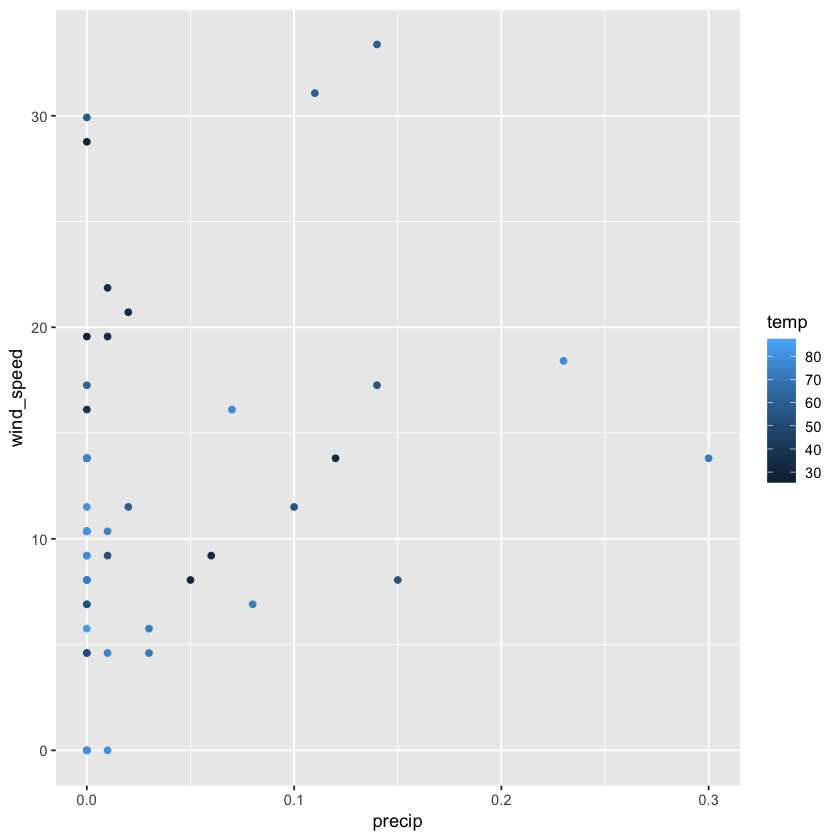

In [91]:
ggplot(weather_most_delayed, aes(x = precip, y = wind_speed, color = temp)) +
  geom_point()

In [93]:
planes_carriers <-
  flights %>%
  filter(!is.na(tailnum)) %>%
  distinct(tailnum, carrier)
planes_carriers

tailnum,carrier
N14228,UA
N24211,UA
N619AA,AA
N804JB,B6
N668DN,DL
N39463,UA
N516JB,B6
N829AS,EV
N593JB,B6
N3ALAA,AA


In [94]:
carrier_transfer_tbl <- planes_carriers %>%
  # keep only planes which have flown for more than one airline
  group_by(tailnum) %>%
  filter(n() > 1) %>%
  # join with airlines to get airline names
  left_join(airlines, by = "carrier") %>%
  arrange(tailnum, carrier)

carrier_transfer_tbl

tailnum,carrier,name
N146PQ,9E,Endeavor Air Inc.
N146PQ,EV,ExpressJet Airlines Inc.
N153PQ,9E,Endeavor Air Inc.
N153PQ,EV,ExpressJet Airlines Inc.
N176PQ,9E,Endeavor Air Inc.
N176PQ,EV,ExpressJet Airlines Inc.
N181PQ,9E,Endeavor Air Inc.
N181PQ,EV,ExpressJet Airlines Inc.
N197PQ,9E,Endeavor Air Inc.
N197PQ,EV,ExpressJet Airlines Inc.


In [95]:
airports %>% count(alt, lon) %>% filter(n > 1)

alt,lon,n


In [96]:
df1 <- tribble(
  ~x, ~y,
   1,  1,
   2,  1
)
df2 <- tribble(
  ~x, ~y,
   1,  1,
   1,  2
)

In [97]:
intersect(df1, df2)
union(df1, df2)
setdiff(df1, df2)
setdiff(df2, df1)


x,y
1,1


x,y
1,1
2,1
1,2


x,y
2,1


x,y
1,2
